[Reference](https://pingouin-stats.org)

In [1]:
!pip install pingouin

     |████████████████████████████████| 225kB 2.7MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.6-cp36-none-any.whl size=217880 sha256=223f0a6429be42eb8ff0be64287c03d104fc12d0f9ccad7b64320e37654d09e6
  Stored in directory: /root/.cache/pip/wheels/0f/12/3e/c50f18f38eaf437b927b567ac6615215fdf75fe58890d32276
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4962 sha256=2e1ab1c970658331f7edcd580b0763bc87829e84924b45785aec7370f4c272b9
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7049 sha256=8775e782f7608859b4a38c5b6eb6bc1879aa81cacf1bd4d58e77bb743ef3db30
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


# 1. T-test

In [2]:
import numpy as np
import pingouin as pg

np.random.seed(123)
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T

# T-test
pg.ttest(x, y)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-3.400706,58,two-sided,0.001222,"[-1.68, -0.43]",0.878059,26.155,0.916807


# 2. Pearson’s correlation

In [3]:
pg.corr(x, y)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,30,0.594785,"[0.3, 0.79]",0.353769,0.3059,0.000527,69.723,0.950373


# 3. Robust correlation

In [4]:
# Introduce an outlier
x[5] = 18
# Use the robust Shepherd's pi correlation
pg.corr(x, y, method="shepherd")

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,30,1,0.561084,"[0.25, 0.77]",0.314815,0.264061,0.001543,0.916576


# 4. Test the normality of the data

In [5]:
print(pg.normality(x))                                    # Univariate normality
print(pg.multivariate_normality(np.column_stack((x, y)))) # Multivariate normality

          W          pval  normal
0  0.615321  1.128503e-07   False
(False, 0.00018201726664169923)


# 5. Q-Q plot

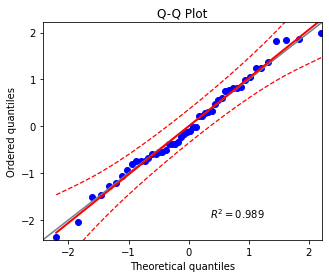

In [6]:
import numpy as np
import pingouin as pg
np.random.seed(123)
x = np.random.normal(size=50)
ax = pg.qqplot(x, dist='norm')

# 6. One-way ANOVA using a pandas DataFrame

In [7]:
# Read an example dataset
df = pg.read_dataset('mixed_anova')

# Run the ANOVA
aov = pg.anova(data=df, dv='Scores', between='Group', detailed=True)
print(aov)

   Source          SS   DF        MS         F   p-unc       np2
0   Group    5.459963    1  5.459963  5.243656  0.0232  0.028616
1  Within  185.342729  178  1.041251       NaN     NaN       NaN


# 7. Repeated measures ANOVA

In [8]:
pg.rm_anova(data=df, dv='Scores', within='Time', subject='Subject', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2,eps
0,Time,7.628428,2,3.814214,3.912796,0.022629,0.062194,0.998751
1,Error,115.027023,118,0.974805,NaN,NaN,NaN,NaN


# 8. Post-hoc tests corrected for multiple-comparisons


In [9]:
# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_ttests(data=df, dv='Scores', within='Time', subject='Subject',
                             parametric=True, padjust='fdr_bh', effsize='hedges')

# Pretty printing of table
pg.print_table(posthoc, floatfmt='.3f')


POST HOC TESTS

Contrast    A        B        Paired    Parametric         T     dof  Tail         p-unc    p-corr  p-adjust      BF10    hedges
----------  -------  -------  --------  ------------  ------  ------  ---------  -------  --------  ----------  ------  --------
Time        August   January  True      True          -1.740  59.000  two-sided    0.087     0.131  fdr_bh       0.582    -0.328
Time        August   June     True      True          -2.743  59.000  two-sided    0.008     0.024  fdr_bh       4.232    -0.483
Time        January  June     True      True          -1.024  59.000  two-sided    0.310     0.310  fdr_bh       0.232    -0.170



# 9. Two-way mixed ANOVA

In [10]:
# Compute the two-way mixed ANOVA and export to a .csv file
aov = pg.mixed_anova(data=df, dv='Scores', between='Group', within='Time',
                     subject='Subject', correction=False, effsize="np2")
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Group        5.460      1     58  5.460  5.052    0.028  0.080  nan
Time         7.628      2    116  3.814  4.027    0.020  0.065    0.999
Interaction  5.167      2    116  2.584  2.728    0.070  0.045  nan



# 10. Pairwise correlations between columns of a dataframe

In [24]:
x[:30].shape

(30,)

In [13]:
y.shape

(30,)

In [14]:
z.shape

(30,)

In [25]:
import pandas as pd
np.random.seed(123)
z = np.random.normal(5, 1, 30)
data = pd.DataFrame({'X': x[:30], 'Y': y, 'Z': z})
pg.pairwise_corr(data, columns=['X', 'Y', 'Z'], method='pearson')

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,X,Y,pearson,two-sided,30,0.799382,"[0.62, 0.9]",0.639011,0.612271,1.096897,1.171652e-07,1.415e+05,0.999930
1,X,Z,pearson,two-sided,30,0.075214,"[-0.29, 0.42]",0.005657,-0.067998,0.075357,6.928276e-01,0.244,0.067738
2,Y,Z,pearson,two-sided,30,0.034116,"[-0.33, 0.39]",0.001164,-0.072824,0.034129,8.579587e-01,0.23,0.053200


# 11. Convert between effect sizes

In [15]:
# Convert from Cohen's d to Hedges' g
pg.convert_effsize(0.4, 'cohen', 'hedges', nx=10, ny=12)

0.38481012658227853

# 12. Multiple linear regression

In [26]:
pg.linear_regression(data[['X', 'Z']], data['Y'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.231141,1.093183,3.870479,6.228210e-04,0.639691,0.613002,1.988115,6.474166
1,X,0.688725,0.099566,6.917262,1.964416e-07,0.639691,0.613002,0.484432,0.893017
2,Z,-0.024327,0.107746,-0.225786,8.230683e-01,0.639691,0.613002,-0.245404,0.196749


# 13. Mediation analysis

In [27]:
pg.mediation_analysis(data=data, x='X', m='Z', y='Y', seed=42, n_boot=1000)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,Z ~ X,0.069504,0.174141,6.928276e-01,-0.287207,0.426215,No
1,Y ~ Z,0.031730,0.175663,8.579587e-01,-0.328100,0.391560,No
2,Total,0.687034,0.097587,1.171652e-07,0.487136,0.886932,Yes
3,Direct,0.688725,0.099566,1.964416e-07,0.484432,0.893017,Yes
4,Indirect,-0.001691,0.024023,8.700000e-01,-0.083674,0.023995,No


# 14. Contingency analysis

In [18]:
data = pg.read_dataset('chi2_independence')
expected, observed, stats = pg.chi2_independence(data, x='sex', y='target')
stats

,test,lambda,chi2,dof,p,cramer,power
0,pearson,1.000000,22.717227,1.0,1.876778e-06,0.273814,0.997494
1,cressie-read,0.666667,22.931427,1.0,1.678845e-06,0.275102,0.997663
2,log-likelihood,0.000000,23.557374,1.0,1.212439e-06,0.278832,0.998096
3,freeman-tukey,-0.500000,24.219622,1.0,8.595211e-07,0.282724,0.998469
4,mod-log-likelihood,-1.000000,25.071078,1.0,5.525544e-07,0.287651,0.998845
5,neyman,-2.000000,27.457956,1.0,1.605471e-07,0.301032,0.999481


# 15. Bland-Altman plot

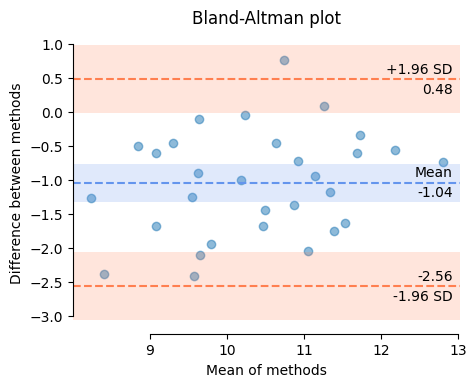

In [19]:
import numpy as np
import pingouin as pg
np.random.seed(123)
mean, cov = [10, 11], [[1, 0.8], [0.8, 1]]
x, y = np.random.multivariate_normal(mean, cov, 30).T
ax = pg.plot_blandaltman(x, y)

# 16. Plot achieved power of a paired T-test

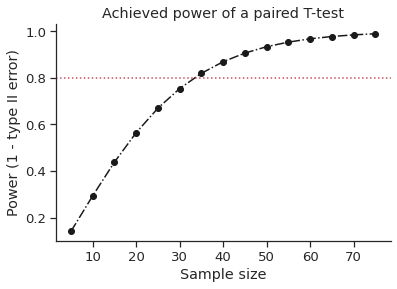

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import numpy as np
sns.set(style='ticks', context='notebook', font_scale=1.2)
d = 0.5  # Fixed effect size
n = np.arange(5, 80, 5)  # Incrementing sample size
# Compute the achieved power
pwr = pg.power_ttest(d=d, n=n, contrast='paired', tail='two-sided')
# Start the plot
plt.plot(n, pwr, 'ko-.')
plt.axhline(0.8, color='r', ls=':')
plt.xlabel('Sample size')
plt.ylabel('Power (1 - type II error)')
plt.title('Achieved power of a paired T-test')
sns.despine()

# 17. Paired plot

Text(0.5, 1.0, 'Effect of meditation on school performance')

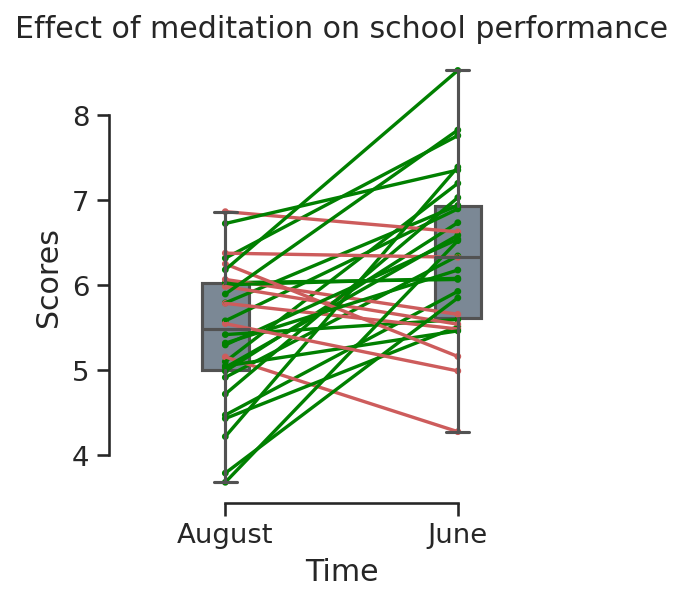

In [21]:
import pingouin as pg
import numpy as np
df = pg.read_dataset('mixed_anova').query("Group == 'Meditation' and Time != 'January'")
ax = pg.plot_paired(data=df, dv='Scores', within='Time', subject='Subject', dpi=150)
ax.set_title("Effect of meditation on school performance")

# Integration with Pandas

In [22]:
import pingouin as pg

# Example 1 | ANOVA
df = pg.read_dataset('mixed_anova')
df.anova(dv='Scores', between='Group', detailed=True)

# Example 2 | Pairwise correlations
data = pg.read_dataset('mediation')
data.pairwise_corr(columns=['X', 'M', 'Y'], covar=['Mbin'])

# Example 3 | Partial correlation matrix
data.pcorr()

,X,M,Y,Mbin,Ybin,W1,W2
X,1.000000,0.359093,0.074315,-0.019338,-0.147393,-0.147963,-0.067496
M,0.359093,1.000000,0.555066,-0.023767,-0.111591,-0.137764,-0.175574
Y,0.074315,0.555066,1.000000,-0.001438,0.169494,0.100920,0.107903
Mbin,-0.019338,-0.023767,-0.001438,1.000000,-0.080233,-0.032491,-0.040473
Ybin,-0.147393,-0.111591,0.169494,-0.080233,1.000000,-0.000241,-0.139795
W1,-0.147963,-0.137764,0.100920,-0.032491,-0.000241,1.000000,-0.394354
W2,-0.067496,-0.175574,0.107903,-0.040473,-0.139795,-0.394354,1.000000
